In [1]:
# Dependencies
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# File to Load
month_home_cost = "C:\\Users\\CodyS\\Desktop\\Group-1-LOB-\\Average Median Monthly Housing Cost Cleaned Up test.csv"
month_caro_income = "C:\\Users\\CodyS\\Desktop\\Group-1-LOB-\\Median NC and SC Monthly Income Cleaned Up.csv"
prop_value = "C:\\Users\\CodyS\\Desktop\\Group-1-LOB-\\Median Property Value by County Cleaned Up.csv" 
sale_price = "C:\\Users\\CodyS\\Desktop\\Group-1-LOB-\\Median Sales Price CSV Cleaned up AVG Per Year.csv" 
sale_inv = "C:\\Users\\CodyS\\Desktop\\Group-1-LOB-\\Sales Inventory Cleaned Up AVG per Year.csv" 
year_income = "C:\\Users\\CodyS\\Desktop\\Group-1-LOB-\\US County Median Yearly Income Cleaned Up.csv"
county_pop = "C:\\Users\\CodyS\\Desktop\\Group-1-LOB-\\US County Population Cleaned Up.csv" 
file_to_output = os.path.join("Combined", "all_years.csv")


In [3]:
# Read Purchasing and store into Pandas data frame
month_home_cost_data = pd.read_csv(month_home_cost)
month_caro_income_data = pd.read_csv(month_caro_income)
prop_value_data = pd.read_csv(prop_value, encoding = "ISO-8859-1")
sale_price_data = pd.read_csv(sale_price)
sale_inv_data = pd.read_csv(sale_inv)
year_income_data = pd.read_csv(year_income, encoding = "ISO-8859-1")
county_pop_data = pd.read_csv(county_pop, encoding = "ISO-8859-1")

In [4]:
# Collecting a list of all columns within the DataFrame
county_pop_data.columns

Index(['County', 'State', '2013', '2014', '2015', '2016', '2017', '2018'], dtype='object')

In [5]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
trim_month_home_cost = month_home_cost_data[['County','2013', '2014', '2015', '2016', '2017', '2018']]
trim_month_caro_inc = month_caro_income_data[['County','2013', '2014', '2015', '2016', '2017', '2018']]
trim_prop_value = prop_value_data[['County','2013', '2014', '2015', '2016', '2017', '2018']]
trim_sale_price = sale_price_data[['County','2013', '2014', '2015', '2016', '2017', '2018']]
trim_sale_inv = sale_inv_data[['County','2013', '2014', '2015', '2016', '2017', '2018']]
trim_year_inc = year_income_data[['County','2013', '2014', '2015', '2016', '2017', '2018']]
trim_county_pop = county_pop_data[['County','2013', '2014', '2015', '2016', '2017', '2018']]

In [6]:
trim_month_home_cost.set_index("County")
trim_month_caro_inc.set_index("County")
trim_prop_value.set_index("County")
trim_sale_price.set_index("County")
trim_sale_inv.set_index("County")
trim_year_inc.set_index("County")
trim_county_pop.set_index("County")

,2013,2014,2015,2016,2017,2018
County,,,,,,
Ada County,416464.0,426236.0,434211.0,444028.0,456849.0,469966.0
Adams County,469193.0,480718.0,491337.0,498187.0,503167.0,511868.0
Adams County,67130.0,66988.0,67013.0,66578.0,66234.0,65691.0
Adams County,101546.0,101714.0,102295.0,102180.0,102336.0,102811.0
Aiken County,164176.0,164753.0,165829.0,167458.0,168179.0,169401.0
...,...,...,...,...,...,...
Yellowstone County,154162.0,155634.0,157048.0,158437.0,158980.0,160137.0
Yolo County,204593.0,207590.0,213016.0,215802.0,219116.0,220408.0
York County,239363.0,245346.0,251195.0,258526.0,266439.0,274118.0


In [7]:
#Trim Counties
clt_month_home_cost= trim_month_home_cost.loc[(trim_month_home_cost["County"] == "York County") | 
	(trim_month_home_cost["County"] == "Lancaster County") |
	(trim_month_home_cost["County"] == "Union County") |
	(trim_month_home_cost["County"] == "Mecklenburg County") |
	(trim_month_home_cost["County"] == "Gaston County") |
	(trim_month_home_cost["County"] == "Licoln County") |
	(trim_month_home_cost["County"] == "Irdell County") |
	(trim_month_home_cost["County"] == "Cabarrus County"), :]

clt_month_inc= trim_month_caro_inc.loc[(trim_month_caro_inc["County"] == "York County") | 
	(trim_month_caro_inc["County"] == "Lancaster County") |
	(trim_month_caro_inc["County"] == "Union County") |
	(trim_month_caro_inc["County"] == "Mecklenburg County") |
	(trim_month_caro_inc["County"] == "Gaston County") |
	(trim_month_caro_inc["County"] == "Licoln County") |
	(trim_month_caro_inc["County"] == "Irdell County") |
	(trim_month_caro_inc["County"] == "Cabarrus County"), :]

clt_prop_value= trim_prop_value.loc[(trim_prop_value["County"] == "York County") | 
	(trim_prop_value["County"] == "Lancaster County") |
	(trim_prop_value["County"] == "Union County") |
	(trim_prop_value["County"] == "Mecklenburg County") |
	(trim_prop_value["County"] == "Gaston County") |
	(trim_prop_value["County"] == "Licoln County") |
	(trim_prop_value["County"] == "Irdell County") |
	(trim_prop_value["County"] == "Cabarrus County"), :]

clt_sale_inv= trim_sale_inv.loc[(trim_sale_inv["County"] == "York County") | 
	(trim_sale_inv["County"] == "Lancaster County") |
	(trim_sale_inv["County"] == "Union County") |
	(trim_sale_inv["County"] == "Mecklenburg County") |
	(trim_sale_inv["County"] == "Gaston County") |
	(trim_sale_inv["County"] == "Licoln County") |
	(trim_sale_inv["County"] == "Irdell County") |
	(trim_sale_inv["County"] == "Cabarrus County"), :]

clt_year_inc= trim_year_inc.loc[(trim_year_inc["County"] == "York County") | 
	(trim_year_inc["County"] == "Lancaster County") |
	(trim_year_inc["County"] == "Union County") |
	(trim_year_inc["County"] == "Mecklenburg County") |
	(trim_year_inc["County"] == "Gaston County") |
	(trim_year_inc["County"] == "Licoln County") |
	(trim_year_inc["County"] == "Irdell County") |
	(trim_year_inc["County"] == "Cabarrus County"), :]

clt_county_pop= trim_county_pop.loc[(trim_county_pop["County"] == "York County") | 
	(trim_county_pop["County"] == "Lancaster County") |
	(trim_county_pop["County"] == "Union County") |
	(trim_county_pop["County"] == "Mecklenburg County") |
	(trim_county_pop["County"] == "Gaston County") |
	(trim_county_pop["County"] == "Licoln County") |
	(trim_county_pop["County"] == "Irdell County") |
	(trim_county_pop["County"] == "Cabarrus County"), :]

clt_sale_price= trim_sale_price.loc[(trim_sale_price["County"] == "York County") | 
	(trim_sale_price["County"] == "Lancaster County") |
	(trim_sale_price["County"] == "Union County") |
	(trim_sale_price["County"] == "Mecklenburg County") |
	(trim_sale_price["County"] == "Gaston County") |
	(trim_sale_price["County"] == "Licoln County") |
	(trim_sale_price["County"] == "Irdell County") |
	(trim_sale_price["County"] == "Cabarrus County"), :]


In [8]:
#Prep for merge by adding column of data drescription
clt_month_home_cost.insert(7, "Data", "Med Monthly Home Cost")
clt_month_inc.insert(7, "Data", "Med Monthly Income")
clt_prop_value.insert(7, "Data", "Med Prop Value")
clt_sale_price.insert(7,"Data", "Med Sale Price")
clt_sale_inv.insert(7,"Data", "Avg On Market Homes")
clt_year_inc.insert(7,"Data", "Med Annual Income")
clt_county_pop.insert(7,"Data", "Med County Pop")

In [9]:
clt_month_home_cost.set_index("Data")
clt_month_home_cost

,County,2013,2014,2015,2016,2017,2018,Data
20,Cabarrus County,1372,1359,1327,1339,1358,1380,Med Monthly Home Cost
56,Gaston County,1179,1176,1151,1137,1148,1170,Med Monthly Home Cost
80,Lancaster County,1149,1126,1117,1132,1161,1217,Med Monthly Home Cost
94,Mecklenburg County,1474,1453,1422,1416,1431,1462,Med Monthly Home Cost
132,Union County,1486,1472,1447,1460,1485,1533,Med Monthly Home Cost
145,York County,1296,1271,1246,1263,1276,1335,Med Monthly Home Cost


In [10]:
clt_month_inc.set_index("Data")

,County,2013,2014,2015,2016,2017,2018
Data,,,,,,,
Med Monthly Income,Cabarrus County,4269.50,4315.00,4334.00,4474.75,4658.92,4870.00
Med Monthly Income,Gaston County,4783.67,4850.42,4903.67,5015.75,5151.33,5405.33
Med Monthly Income,Lancaster County,5098.00,5099.75,5198.33,5330.67,5504.58,5739.92
Med Monthly Income,Mecklenburg County,5330.08,5301.75,5334.33,5454.67,5732.33,5997.75
Med Monthly Income,Union County,6154.25,6271.67,6274.00,6369.33,6625.00,6862.00
Med Monthly Income,Union County,6197.75,6305.08,6350.00,6373.83,6667.00,6880.17
Med Monthly Income,York County,8471.42,8407.42,8525.42,8712.75,8998.67,9265.42


In [11]:
clt_prop_value.set_index("Data")

,County,2013,2014,2015,2016,2017,2018
Data,,,,,,,
Med Prop Value,Cabarrus County,168400.0,169800.0,170600.0,199200.0,208000.0,219700.0
Med Prop Value,Gaston County,122400.0,127500.0,128000.0,136400.0,141400.0,153700.0
Med Prop Value,Lancaster County,150100.0,161000.0,159600.0,184000.0,187700.0,211500.0
Med Prop Value,Mecklenburg County,176600.0,189900.0,203700.0,221400.0,234100.0,253000.0
Med Prop Value,Union County,191100.0,209700.0,216800.0,223300.0,232300.0,269900.0
Med Prop Value,York County,157500.0,162900.0,171200.0,180700.0,199400.0,219500.0


In [12]:
clt_sale_price.set_index("Data")

,County,2013,2014,2015,2016,2017,2018
Data,,,,,,,
Med Sale Price,Cabarrus County,138617,145200,158275,168117,175975,193008
Med Sale Price,Gaston County,103633,115442,124217,129283,134383,147867
Med Sale Price,Lancaster County,142957,138300,173708,197183,196117,218983
Med Sale Price,Mecklenburg County,168792,179700,191333,197850,199717,228833
Med Sale Price,Union County,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,296967,305000
Med Sale Price,Union County,173633,186233,202075,212817,222992,249392
Med Sale Price,York County,166475,169358,185942,205817,221250,238983


In [13]:
clt_sale_inv.set_index("Data")

,County,2013,2014,2015,2016,2017,2018
Data,,,,,,,
Avg On Market Homes,Cabarrus County,207,238,258,312,340,349
Avg On Market Homes,Gaston County,215,247,230,279,340,365
Avg On Market Homes,Lancaster County,99,107,101,130,147,155
Avg On Market Homes,Mecklenburg County,1433,1477,1552,1847,2183,1906
Avg On Market Homes,Mecklenburg County,24,30,26,30,44,39
Avg On Market Homes,Union County,274,300,354,366,394,375
Avg On Market Homes,York County,514,561,632,617,688,712


In [14]:
clt_year_inc.set_index("Data")

,County,2013,2014,2015,2016,2017,2018
Data,,,,,,,
Med Annual Income,Cabarrus County,54307.0,54347.0,56853.0,63386.0,61490.0,69679.0
Med Annual Income,Gaston County,41728.0,41011.0,44293.0,48711.0,49670.0,52741.0
Med Annual Income,Lancaster County,38500.0,44412.0,45676.0,56216.0,61914.0,57224.0
Med Annual Income,Mecklenburg County,54278.0,58841.0,56883.0,62978.0,65588.0,63967.0
Med Annual Income,Union County,63355.0,62898.0,71729.0,71588.0,77691.0,80337.0
Med Annual Income,York County,54439.0,52565.0,56359.0,60767.0,62217.0,64319.0


In [15]:
clt_county_pop.set_index("Data")

,County,2013,2014,2015,2016,2017,2018
Data,,,,,,,
Med County Pop,Cabarrus County,187226.0,192103.0,196762.0,201590.0,206872.0,211342.0
Med County Pop,Gaston County,209420.0,211127.0,213442.0,216965.0,220182.0,222846.0
Med County Pop,Lancaster County,80458.0,83160.0,85842.0,89594.0,92550.0,95380.0
Med County Pop,Mecklenburg County,990977.0,1012539.0,1034070.0,1054835.0,1076837.0,1093901.0
Med County Pop,Union County,212756.0,218568.0,222742.0,226606.0,231366.0,235908.0
Med County Pop,York County,239363.0,245346.0,251195.0,258526.0,266439.0,274118.0


In [16]:
#Append all DF
clt_data = clt_month_home_cost.append([clt_month_inc, clt_prop_value, clt_sale_price, clt_sale_inv, clt_year_inc, clt_county_pop])
# get a list of columns
cols = list(clt_data)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Data')))
cols

['Data', 'County', '2013', '2014', '2015', '2016', '2017', '2018']

In [17]:
# use ix to reorder
clt_data = clt_data.loc[:, cols]
clt_data

,Data,County,2013,2014,2015,2016,2017,2018
20,Med Monthly Home Cost,Cabarrus County,1372,1359,1327,1339,1358,1380
56,Med Monthly Home Cost,Gaston County,1179,1176,1151,1137,1148,1170
80,Med Monthly Home Cost,Lancaster County,1149,1126,1117,1132,1161,1217
94,Med Monthly Home Cost,Mecklenburg County,1474,1453,1422,1416,1431,1462
132,Med Monthly Home Cost,Union County,1486,1472,1447,1460,1485,1533
145,Med Monthly Home Cost,York County,1296,1271,1246,1263,1276,1335
20,Med Monthly Income,Cabarrus County,4269.5,4315,4334,4474.75,4658.92,4870
56,Med Monthly Income,Gaston County,4783.67,4850.42,4903.67,5015.75,5151.33,5405.33
80,Med Monthly Income,Lancaster County,5098,5099.75,5198.33,5330.67,5504.58,5739.92
94,Med Monthly Income,Mecklenburg County,5330.08,5301.75,5334.33,5454.67,5732.33,5997.75


In [18]:
#Found that we need to compare to broader group - Prep unfiltered data for merge by adding column of data drescription
trim_month_home_cost.insert(7, "Data", "Med Monthly Home Cost")
trim_month_caro_inc.insert(7, "Data", "Med Monthly Income")
trim_prop_value.insert(7, "Data", "Med Prop Value")
trim_sale_price.insert(7,"Data", "Med Sale Price")
trim_sale_inv.insert(7,"Data", "Avg On Market Homes")
trim_year_inc.insert(7,"Data", "Med Annual Income")
trim_county_pop.insert(7,"Data", "Med County Pop")

#Append all DF
unfilter_data = trim_month_home_cost.append([trim_month_caro_inc, trim_prop_value, trim_sale_price, trim_sale_inv, trim_year_inc, trim_county_pop])
# get a list of columns
cols = list(clt_data)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Data')))
unfilter_data

,County,2013,2014,2015,2016,2017,2018,Data
0,Abbeville County,1008,1025,985,1027,1003,989,Med Monthly Home Cost
1,Aiken County,1110,1125,1109,1112,1118,1143,Med Monthly Home Cost
2,Alamance County,1213,1192,1172,1162,1158,1170,Med Monthly Home Cost
3,Alexander County,986,966,935,946,991,1017,Med Monthly Home Cost
4,Alleghany County,1098,1133,1039,1083,1011,997,Med Monthly Home Cost
...,...,...,...,...,...,...,...,...
829,Yellowstone County,154162,155634,157048,158437,158980,160137,Med County Pop
830,Yolo County,204593,207590,213016,215802,219116,220408,Med County Pop
831,York County,239363,245346,251195,258526,266439,274118,Med County Pop
832,Yuba County,73340,73966,74492,75275,77031,78041,Med County Pop


In [19]:
unfilter_data.to_csv('nfilter_data.csv')
clt_data.to_csv('clt_data.csv')

In [20]:
clt_data

,Data,County,2013,2014,2015,2016,2017,2018
20,Med Monthly Home Cost,Cabarrus County,1372,1359,1327,1339,1358,1380
56,Med Monthly Home Cost,Gaston County,1179,1176,1151,1137,1148,1170
80,Med Monthly Home Cost,Lancaster County,1149,1126,1117,1132,1161,1217
94,Med Monthly Home Cost,Mecklenburg County,1474,1453,1422,1416,1431,1462
132,Med Monthly Home Cost,Union County,1486,1472,1447,1460,1485,1533
145,Med Monthly Home Cost,York County,1296,1271,1246,1263,1276,1335
20,Med Monthly Income,Cabarrus County,4269.5,4315,4334,4474.75,4658.92,4870
56,Med Monthly Income,Gaston County,4783.67,4850.42,4903.67,5015.75,5151.33,5405.33
80,Med Monthly Income,Lancaster County,5098,5099.75,5198.33,5330.67,5504.58,5739.92
94,Med Monthly Income,Mecklenburg County,5330.08,5301.75,5334.33,5454.67,5732.33,5997.75


In [21]:
clt_data

,Data,County,2013,2014,2015,2016,2017,2018
20,Med Monthly Home Cost,Cabarrus County,1372,1359,1327,1339,1358,1380
56,Med Monthly Home Cost,Gaston County,1179,1176,1151,1137,1148,1170
80,Med Monthly Home Cost,Lancaster County,1149,1126,1117,1132,1161,1217
94,Med Monthly Home Cost,Mecklenburg County,1474,1453,1422,1416,1431,1462
132,Med Monthly Home Cost,Union County,1486,1472,1447,1460,1485,1533
145,Med Monthly Home Cost,York County,1296,1271,1246,1263,1276,1335
20,Med Monthly Income,Cabarrus County,4269.5,4315,4334,4474.75,4658.92,4870
56,Med Monthly Income,Gaston County,4783.67,4850.42,4903.67,5015.75,5151.33,5405.33
80,Med Monthly Income,Lancaster County,5098,5099.75,5198.33,5330.67,5504.58,5739.92
94,Med Monthly Income,Mecklenburg County,5330.08,5301.75,5334.33,5454.67,5732.33,5997.75


In [22]:
clt_month_inc.set_index("Data")

,County,2013,2014,2015,2016,2017,2018
Data,,,,,,,
Med Monthly Income,Cabarrus County,4269.50,4315.00,4334.00,4474.75,4658.92,4870.00
Med Monthly Income,Gaston County,4783.67,4850.42,4903.67,5015.75,5151.33,5405.33
Med Monthly Income,Lancaster County,5098.00,5099.75,5198.33,5330.67,5504.58,5739.92
Med Monthly Income,Mecklenburg County,5330.08,5301.75,5334.33,5454.67,5732.33,5997.75
Med Monthly Income,Union County,6154.25,6271.67,6274.00,6369.33,6625.00,6862.00
Med Monthly Income,Union County,6197.75,6305.08,6350.00,6373.83,6667.00,6880.17
Med Monthly Income,York County,8471.42,8407.42,8525.42,8712.75,8998.67,9265.42


In [23]:
import matplotlib.pyplot as plt

In [47]:
count = clt_data["County"].value_counts()
count

Union County          9
Mecklenburg County    8
York County           7
Lancaster County      7
Cabarrus County       7
Gaston County         7
Name: County, dtype: int64

In [69]:
clt_month_inc

,County,2013,2014,2015,2016,2017,2018,Data
20,Cabarrus County,4269.50,4315.00,4334.00,4474.75,4658.92,4870.00,Med Monthly Income
56,Gaston County,4783.67,4850.42,4903.67,5015.75,5151.33,5405.33,Med Monthly Income
80,Lancaster County,5098.00,5099.75,5198.33,5330.67,5504.58,5739.92,Med Monthly Income
94,Mecklenburg County,5330.08,5301.75,5334.33,5454.67,5732.33,5997.75,Med Monthly Income
132,Union County,6154.25,6271.67,6274.00,6369.33,6625.00,6862.00,Med Monthly Income
133,Union County,6197.75,6305.08,6350.00,6373.83,6667.00,6880.17,Med Monthly Income
145,York County,8471.42,8407.42,8525.42,8712.75,8998.67,9265.42,Med Monthly Income


In [73]:
clt_data

,Data,County,2013,2014,2015,2016,2017,2018
20,Med Monthly Home Cost,Cabarrus County,1372,1359,1327,1339,1358,1380
56,Med Monthly Home Cost,Gaston County,1179,1176,1151,1137,1148,1170
80,Med Monthly Home Cost,Lancaster County,1149,1126,1117,1132,1161,1217
94,Med Monthly Home Cost,Mecklenburg County,1474,1453,1422,1416,1431,1462
132,Med Monthly Home Cost,Union County,1486,1472,1447,1460,1485,1533
145,Med Monthly Home Cost,York County,1296,1271,1246,1263,1276,1335
20,Med Monthly Income,Cabarrus County,4269.5,4315,4334,4474.75,4658.92,4870
56,Med Monthly Income,Gaston County,4783.67,4850.42,4903.67,5015.75,5151.33,5405.33
80,Med Monthly Income,Lancaster County,5098,5099.75,5198.33,5330.67,5504.58,5739.92
94,Med Monthly Income,Mecklenburg County,5330.08,5301.75,5334.33,5454.67,5732.33,5997.75


In [107]:
df = pd.read_csv("C:\\Users\\CodyS\\Desktop\\Group-1-LOB-\\clt_stat.csv")
clt_stat = df
print (clt_stat)

     Unnamed: 0                   Data              County     Stat  Year
0          20.0  Med Monthly Home Cost     Cabarrus County     1372  2013
1          56.0  Med Monthly Home Cost       Gaston County     1179  2013
2          80.0  Med Monthly Home Cost    Lancaster County     1149  2013
3          94.0  Med Monthly Home Cost  Mecklenburg County     1474  2013
4         132.0  Med Monthly Home Cost        Union County     1486  2013
..          ...                    ...                 ...      ...   ...
265         NaN         Med County Pop       Gaston County   222846  2018
266         NaN         Med County Pop    Lancaster County    95380  2018
267         NaN         Med County Pop  Mecklenburg County  1093901  2018
268         NaN         Med County Pop        Union County   235908  2018
269         NaN         Med County Pop         York County   274118  2018

[270 rows x 5 columns]


In [108]:
clt_stat

,Unnamed: 0,Data,County,Stat,Year
0,20.0,Med Monthly Home Cost,Cabarrus County,1372,2013
1,56.0,Med Monthly Home Cost,Gaston County,1179,2013
2,80.0,Med Monthly Home Cost,Lancaster County,1149,2013
3,94.0,Med Monthly Home Cost,Mecklenburg County,1474,2013
4,132.0,Med Monthly Home Cost,Union County,1486,2013
...,...,...,...,...,...
265,NaN,Med County Pop,Gaston County,222846,2018
266,NaN,Med County Pop,Lancaster County,95380,2018
267,NaN,Med County Pop,Mecklenburg County,1093901,2018
268,NaN,Med County Pop,Union County,235908,2018


In [110]:
df = pd.read_csv("clt_cleaned.csv")
clt_cleaned = df
print (clt_cleaned)

                County  Year  Med Monthly Home Cost  Med Monthly Income  \
0      Cabarrus County  2013                   1372                4270   
1        Gaston County  2013                   1179                4784   
2     Lancaster County  2013                   1149                5098   
3   Mecklenburg County  2013                   1474                5330   
4         Union County  2013                   1486                6154   
5          York County  2013                   1296                8471   
6      Cabarrus County  2014                   1359                4315   
7        Gaston County  2014                   1176                4850   
8     Lancaster County  2014                   1126                5100   
9   Mecklenburg County  2014                   1453                5302   
10        Union County  2014                   1472                6305   
11         York County  2014                   1271                8407   
12     Cabarrus County  2

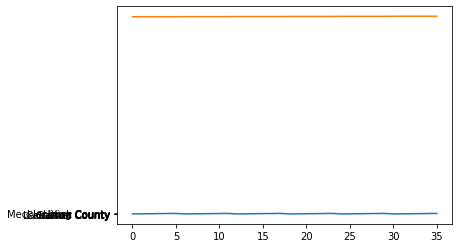

In [116]:
plt.plot(clt_cleaned.County)
plt.plot(clt_cleaned.Year)